In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [6]:
data_portion=pd.read_csv("../summary_data/portion.captured.items.csv")
data_portion.tail()

,th,imrep_portion_items,mixcr_portion_items
1995,0.00020,0.032731,0.024266
1996,0.00015,0.032733,0.023459
1997,0.00010,0.032154,0.023044
1998,0.00005,0.028007,0.020202
1999,0.00000,0.023587,0.016848


In [9]:
colors = ['#F7941D', '#00b9f2', '#00a875', '#ecde38', '#0072bc', '#F15a22', '#da6fab']
sns.set_palette(sns.color_palette(colors))
sns.set_context('talk')
sns.set_style('white')

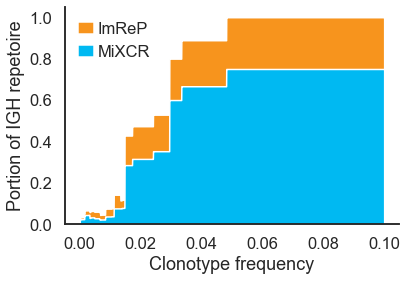

In [12]:
fig, ax = plt.subplots(nrows=1, ncols=1)


ax.stackplot(data_portion['th'], data_portion['imrep_portion_items'],labels=["ImReP"])
ax.stackplot(data_portion['th'], data_portion['mixcr_portion_items'],labels=["MiXCR"])

#ax.invert_xaxis()

plt.legend(bbox_to_anchor=(0.3,1), frameon=False, ncol=1, handletextpad=0.2, columnspacing=0.8, handlelength=1)


locs, labels = plt.xticks()
#plt.xticks(np.arange(0, 10, step=0.1))


ax.set_ylabel('Portion of IGH repetoire', fontsize='medium')   # relative to plt.rcParams['font.size']
ax.set_xlabel('Clonotype frequency', fontsize='medium')   # relative to plt.rcParams['font.size']

#ax.spines['right'].set_visible(False)
#ax.spines['top'].set_visible(False)
sns.despine()

plt.savefig('../figures/FigureS4.png', bbox_inches='tight')
plt.savefig('../figures/FigureS4.pdf', bbox_inches='tight')